# Keras
Librería para programar redes neuronales de una manera más sencilla que con TensorFlow. Keras se encuentra en una capa de abstracción por encima de TensorFlow.

[Documentación](https://keras.io/guides/)

In [1]:
#!pip install tensorflow
#!pip install keras

Empezamos importando librerías

In [2]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)


TensorFlow version: 2.17.0


In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
import numpy as np

Cargamos los datos de mnist. No vamos a tratar imagenes con redes convolucionales (perdemos la estructura espacial 2D). Todos los pixeles se convertirán en un vector de 28x28 features independientes, que serán las entradas del modelo.

In [4]:
# Cogemos las imágenes de los dígitos asi como el conjunto de train y test
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

Vemos dimensiones del dataset

In [5]:
'''
60.000 imagenes de 28x28 pixeles
'''
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [6]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [7]:
2**8

256

60.000 imágenes de 28x28 pixeles. Vamos a representar una de ellas

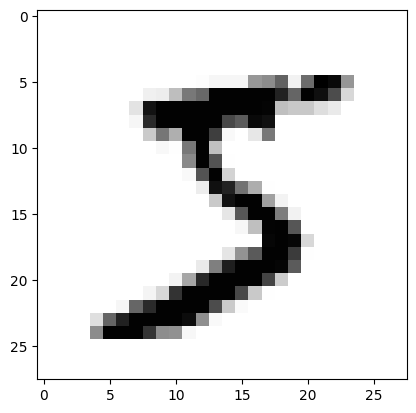

In [8]:
import matplotlib.pyplot as plt
from matplotlib import colormaps

plt.imshow(X_train[0], cmap=colormaps.get("Greys"));

Cada imagen se compone de 28x28 pixeles, y cada pixel representa una escala de grises que va del 0 al 255. Siendo 0 el blanco y 255 negro.

¿Se te ocurre alguna manera de normalizar los datos?

In [9]:
np.max(X_train)

255

In [10]:
0/255

0.0

In [11]:
128/255

0.5019607843137255

In [12]:
255/255

1.0

In [13]:
X_train = X_train.astype("float32")/255
X_test = X_test.astype("float32")/255

In [14]:
np.mean(X_train)

0.13066062

In [15]:
'''
Comprobamos la normalización
'''
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [16]:
y_train = y_train.astype("float32")
y_test = y_test.astype("float32")

Guardamos datos para validación. Estos datos se usarán durante el entrenamiento. Otra opción es decirle a keras en la etapa de entrenamiento que reserve un X % de los datos para validar.

In [17]:
X_val = X_train[-10000:]
y_val = y_train[-10000:]

X_train = X_train[:-10000]
y_train = y_train[:-10000]

In [18]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(50000, 28, 28)
(10000, 28, 28)
(10000, 28, 28)


Montamos la arquitectura de la red neuronal. Se va a componer de:
* **Sequential**: API para iniciar la red neuronal. No cuenta como capa.
* **Flatten**: capa de entrada. Necesita un vector unidimensional. Como tenemos imágenes, esta capa aplana las imagenes (2D) en 1D.
* **Dense**: es una hidden layer. Se compondrá de `n` neuronas y de una función de activación que se aplicará a todas las neuronas de la capa.

Recuerda que es un problema de clasificación multiclase (10 clases) y que por tanto la última capa se compondrá de tantas neuronas como clases tengas.

En cuanto a las funciones de activación es recomendable usar relu en las hidden layer, que tarda menos en entrenar, mientras que la ultima (output) suele ser una softmax.

In [19]:
28*28

784

In [20]:
X_train.shape

(50000, 28, 28)

In [21]:
model = keras.models.Sequential()

# Capa entrada
model.add(keras.layers.Flatten(input_shape=(28, 28)))

# Hidden layer
model.add(keras.layers.Dense(units = 300,
                            activation='relu'))

# Hidden layer
model.add(keras.layers.Dense(units = 100,
                            activation='relu'))

# Capa salida
model.add(keras.layers.Dense(units = 10,
                            activation='softmax'))

C:\Users\urios\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [22]:
# Otra manera de declarar la red neuronal
capas = [
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(units = 300, activation='relu'),
    keras.layers.Dense(units = 100, activation='relu'),
    keras.layers.Dense(units = 10, activation='softmax')
]

model = keras.models.Sequential(capas)

Podemos ver las capas, y acceder a sus elementos

In [23]:
print(model.layers[0])

<Flatten name=flatten_1, built=True>


Podemos ver los pesos de las capas sin entrenar, porque los inicializa aleatoriamente. Los bias los inicializa a 0.

In [24]:
hidden1 = model.layers[1]
weights, biases = hidden1.get_weights()

In [25]:
weights

array([[ 0.00466809,  0.06035672, -0.01180046, ...,  0.04468985,
        -0.01428013, -0.07408559],
       [-0.04493108, -0.01662576,  0.07422262, ..., -0.05103069,
        -0.05017352,  0.02281159],
       [ 0.04827009,  0.02374005, -0.05087073, ...,  0.07043166,
         0.05579309,  0.0704955 ],
       ...,
       [-0.05824379, -0.0386949 ,  0.07358617, ...,  0.03699018,
        -0.05981547,  0.01500885],
       [-0.04874445,  0.03723348, -0.02360431, ...,  0.07380305,
         0.00960161,  0.03029718],
       [ 0.06327899, -0.06885989,  0.0144003 , ..., -0.0358435 ,
        -0.06589372,  0.02310132]], dtype=float32)

In [26]:
len(weights)

784

In [27]:
len(weights[0])

300

In [28]:
28*28

784

In [29]:
300*784

235200

In [30]:
weights.size

235200

In [31]:
len(biases)

300

Establecemos la configuración de ejecución... el compile.

In [32]:
model.compile(
    optimizer = keras.optimizers.SGD(),
    loss = keras.losses.SparseCategoricalCrossentropy(),
    metrics = [keras.metrics.SparseCategoricalAccuracy()]
)

In [33]:
# Equivalente
model.compile(
    optimizer = "sgd",
    loss = "sparse_categorical_crossentropy",
    metrics = ["accuracy"]
)

In [34]:
# Summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [35]:
784 * 300 + 300

235500

In [36]:
# 1º neurona de la 1º hidden layer
# y = a + w1*x1 + w2*x2 + .... wn*xn
# a es el intercepto llamado bias
# wn es cada uno de los pesos que va a ir actualizando con el backpropagation
# n es 784
# En la 1º hidden layer tenemos 784 pesos por cada neurona, al tener 300, tenemos un total de:
print(784*300 + 300)

235500


In [37]:
300 * 784 + 300

235500

In [38]:
300 * 100 + 100

30100

In [39]:
100 * 10 + 10

1010

Entrenamos el modelo. Usamos los datos de entrenamiento. El batch_size es la cantidad de muestras que utiliza el SGD, y las epochs son las iteraciones que realiza en el entrenamiento.

In [40]:
X_train.shape

(50000, 28, 28)

In [41]:
50000/128

390.625

In [42]:
history = model.fit(
    X_train,
    y_train,
    batch_size = 128,
    epochs = 50,
    validation_data = (X_val, y_val) # validation_split = 0.1
)

Epoch 1/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4635 - loss: 1.8250 - val_accuracy: 0.8565 - val_loss: 0.6319
Epoch 2/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8538 - loss: 0.5932 - val_accuracy: 0.8979 - val_loss: 0.4006
Epoch 3/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8892 - loss: 0.4160 - val_accuracy: 0.9112 - val_loss: 0.3364
Epoch 4/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9014 - loss: 0.3559 - val_accuracy: 0.9168 - val_loss: 0.3019
Epoch 5/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9107 - loss: 0.3201 - val_accuracy: 0.9222 - val_loss: 0.2794
Epoch 6/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9158 - loss: 0.3043 - val_accuracy: 0.9267 - val_loss: 0.2648
Epoch 7/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9196 - loss: 0.2871 - val_accuracy: 0.9298 - val_loss: 0.2512
Epoch 8/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9266 - loss: 0.2580 - val_accuracy: 0.

Podemos reentrenar el modelo. No empieza de nuevo, sino que retoma el entrenamiento anterior.

In [43]:
model.fit(
    X_train,
    y_train,
    batch_size = 64,
    epochs = 10,
    validation_data = (X_val, y_val) # validation_split = 0.1
)

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9773 - loss: 0.0822 - val_accuracy: 0.9697 - val_loss: 0.1067
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9773 - loss: 0.0810 - val_accuracy: 0.9704 - val_loss: 0.1030
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9782 - loss: 0.0785 - val_accuracy: 0.9703 - val_loss: 0.1044
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9797 - loss: 0.0745 - val_accuracy: 0.9705 - val_loss: 0.1004
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9813 - loss: 0.0690 - val_accuracy: 0.9715 - val_loss: 0.0967
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9810 - loss: 0.0668 - val_accuracy: 0.9720 - val_loss: 0.0955
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9822 - loss: 0.0663 - val_accuracy: 0.9724 - val_loss: 0.0951
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9821 - loss: 0.0657 - val_accuracy: 0.

Veamos el histórico del entrenamiento, para poder representarlo posteriormente.

In [44]:
# print(history.params)
# print(history.epoch)
print(history.history)

{'accuracy': [0.6607599854469299, 0.8658400177955627, 0.892300009727478, 0.9033799767494202, 0.9110199809074402, 0.9178000092506409, 0.9222999811172485, 0.9253799915313721, 0.9298200011253357, 0.9321399927139282, 0.9350000023841858, 0.9373599886894226, 0.9396399855613708, 0.9418200254440308, 0.9437000155448914, 0.9458799958229065, 0.9474800229072571, 0.9488400220870972, 0.9506000280380249, 0.9519000053405762, 0.953220009803772, 0.954800009727478, 0.9557200074195862, 0.9572799801826477, 0.9578400254249573, 0.9593600034713745, 0.9599599838256836, 0.961139976978302, 0.9622399806976318, 0.96315997838974, 0.9645199775695801, 0.9648399949073792, 0.9660800099372864, 0.9662200212478638, 0.9674999713897705, 0.9681400060653687, 0.9688199758529663, 0.9698399901390076, 0.97052001953125, 0.9708200097084045, 0.9715800285339355, 0.972000002861023, 0.973039984703064, 0.9734799861907959, 0.9740800261497498, 0.9749600291252136, 0.975380003452301, 0.9758599996566772, 0.9763200283050537, 0.976819992065429

In [45]:
history.history

{'accuracy': [0.6607599854469299,
  0.8658400177955627,
  0.892300009727478,
  0.9033799767494202,
  0.9110199809074402,
  0.9178000092506409,
  0.9222999811172485,
  0.9253799915313721,
  0.9298200011253357,
  0.9321399927139282,
  0.9350000023841858,
  0.9373599886894226,
  0.9396399855613708,
  0.9418200254440308,
  0.9437000155448914,
  0.9458799958229065,
  0.9474800229072571,
  0.9488400220870972,
  0.9506000280380249,
  0.9519000053405762,
  0.953220009803772,
  0.954800009727478,
  0.9557200074195862,
  0.9572799801826477,
  0.9578400254249573,
  0.9593600034713745,
  0.9599599838256836,
  0.961139976978302,
  0.9622399806976318,
  0.96315997838974,
  0.9645199775695801,
  0.9648399949073792,
  0.9660800099372864,
  0.9662200212478638,
  0.9674999713897705,
  0.9681400060653687,
  0.9688199758529663,
  0.9698399901390076,
  0.97052001953125,
  0.9708200097084045,
  0.9715800285339355,
  0.972000002861023,
  0.973039984703064,
  0.9734799861907959,
  0.9740800261497498,
  0.9749

In [46]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [47]:
pd.DataFrame(history.history)

,accuracy,loss,val_accuracy,val_loss
0,0.66076,1.347947,0.8565,0.631917
1,0.86584,0.530248,0.8979,0.400578
2,0.89230,0.399439,0.9112,0.336351
3,0.90338,0.347131,0.9168,0.301897
4,0.91102,0.316167,0.9222,0.279445
5,0.91780,0.294196,0.9267,0.264779
6,0.92230,0.277033,0.9298,0.251189
7,0.92538,0.262975,0.9331,0.240638
8,0.92982,0.250445,0.9360,0.231428
9,0.93214,0.239906,0.9387,0.221016


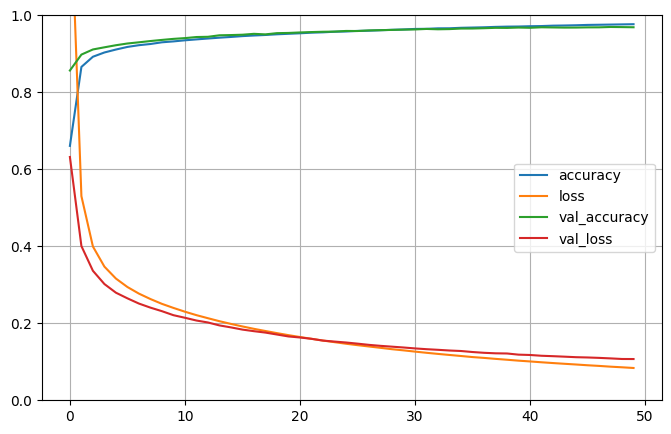

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

Si el modelo no ha ido bien, prueba a cambiar el learning rate, cambia de optimizador y después prueba a cambiar capas, neuronas y funciones de activación.

Ya tenemos el modelo entrenado. Probémoslo con test

In [49]:
results = model.evaluate(X_test, y_test)
results

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9675 - loss: 0.1080


[0.0913972333073616, 0.9718000292778015]

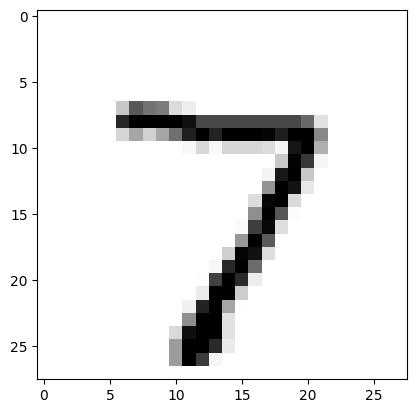

In [50]:
# Cogemos el primero
plt.imshow(X_test[0].reshape(28,28), cmap=colormaps.get("Greys"));

In [51]:
X_test[:1]

array([[[0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.

In [52]:
predictions = model.predict(X_test[:1])
print(predictions.shape)
predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
(1, 10)


array([[3.43700663e-06, 1.40492898e-06, 3.58009624e-04, 3.02607939e-03,
        1.07145524e-07, 5.52521396e-06, 1.81450827e-10, 9.96525228e-01,
        3.84852001e-06, 7.63918724e-05]], dtype=float32)

In [53]:
predictions.argmax()

7

In [54]:
model.predict(X_test).argmax(axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 918us/step


array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

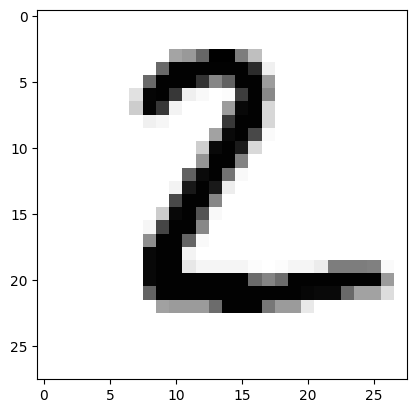

In [55]:
plt.imshow(X_test[1].reshape(28,28), cmap=colormaps.get("Greys"));

In [56]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, model.predict(X_test).argmax(axis=1))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[ 966,    0,    1,    1,    3,    2,    4,    1,    2,    0],
       [   0, 1122,    3,    1,    0,    1,    3,    0,    5,    0],
       [   6,    4, 1004,    2,    2,    0,    2,    7,    5,    0],
       [   0,    1,    4,  990,    0,    3,    0,    3,    8,    1],
       [   2,    0,    5,    1,  958,    0,    1,    1,    2,   12],
       [   5,    0,    0,   11,    1,  857,    6,    1,    8,    3],
       [   5,    3,    2,    1,    9,    4,  928,    0,    6,    0],
       [   1,   10,   10,    2,    0,    0,    0,  995,    3,    7],
       [   3,    1,    2,    9,    5,    6,    4,    3,  939,    2],
       [   7,    6,    1,   10,   14,    1,    1,    6,    4,  959]],
      dtype=int64)

### Problema de regresión
Veamos un ejemplo de cómo aplicar una red neuronal de TensorFlow a un problema de regresión.

In [57]:
# Cargamos datos
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns = housing.feature_names)
df['target'] = housing['target']
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


Divimos en train, test y validation

In [58]:
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data,
                                                              housing.target)

X_train, X_valid, y_train, y_valid = train_test_split(X_train_full,
                                                      y_train_full)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [59]:
X_train.shape

(11610, 8)

Montamos el modelo. Simplemente se compondrá de una hidden layer, a la que le configuramos una capa previa de entrada de 8 neuronas (las features).

Se trata de un modelo de regresión, por lo que la capa de salida es una única neurona.

In [60]:
11610/32

362.8125

In [61]:
X_train.shape[1:]

(8,)

In [62]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation = 'relu',
                      input_shape = X_train.shape[1:]),
    keras.layers.Dense(1)
])

model.compile(loss = "mean_squared_error",
             optimizer = "sgd")

history = model.fit(X_train,
                   y_train,
                   epochs = 20,
                   validation_data = (X_valid, y_valid))

Epoch 1/20
  1/363 ━━━━━━━━━━━━━━━━━━━━ 54s 152ms/step - loss: 4.3275

C:\Users\urios\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.1847 - val_loss: 0.5404
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 924us/step - loss: 1.2718 - val_loss: 0.5136
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 972us/step - loss: 0.5287 - val_loss: 0.5145
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 919us/step - loss: 0.5117 - val_loss: 0.4730
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 948us/step - loss: 0.4686 - val_loss: 0.4690
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 822us/step - loss: 0.4444 - val_loss: 0.4533
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 877us/step - loss: 0.4548 - val_loss: 0.4489
Epoch 8/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 741us/step - loss: 0.4412 - val_loss: 0.4433
Epoch 9/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4244 - val_loss: 0.4342
Epoch 10/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 835us/step - loss: 0.4364 - val_loss: 0.4326
Epoch 11/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 808us/step - loss: 0.4148 - val_loss: 0.4281
Epoch 12/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 8

In [63]:
8*30 + 30

270

In [64]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 30)             │           270 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 303 (1.19 KB)

 Trainable params: 301 (1.18 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [65]:
mse_test = model.evaluate(X_test, y_test)
print(mse_test)

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3756
0.368349552154541


In [66]:
y_pred = model.predict(X_test[:5])
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


array([[2.1832263],
       [1.3141419],
       [1.6276239],
       [3.8186738],
       [2.8782482]], dtype=float32)

### Guardar modelo
Para guardar el modelo, en el formato de Keras (HDF5). 

In [67]:
model.save("my_keras_model.keras")

In [68]:
# Lo volvemos a cargar
model = keras.models.load_model("my_keras_model.keras")

### Callbacks
Son funciones predefinidas de Keras a aplicar durante el entrenamiento
Por ejemplo, `ModelCheckpoint` sirve para que el modelo se vaya guardando tras cada epoch. Así no perdemos el progreso en caso de que decidamos interrumpir el entrenamiento. El callback recibe como argumento el nombre del objeto donde queremos que se guarde el modelo entrenado.

In [69]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("callback_model.keras")
history = model.fit(X_train,
                   y_train,
                   epochs=30,
                   callbacks = [checkpoint_cb])

Epoch 1/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 784us/step - loss: 0.4012
Epoch 2/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 776us/step - loss: 0.3793
Epoch 3/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 828us/step - loss: 0.4044
Epoch 4/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 770us/step - loss: 0.3859
Epoch 5/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 829us/step - loss: 0.3919
Epoch 6/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 814us/step - loss: 0.3881
Epoch 7/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 872us/step - loss: 0.3867
Epoch 8/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 778us/step - loss: 0.3777
Epoch 9/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 844us/step - loss: 0.3748
Epoch 10/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 882us/step - loss: 0.3823
Epoch 11/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 783us/step - loss: 0.3789
Epoch 12/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 775us/step - loss: 0.3588
Epoch 13/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 923us/step - loss: 0.3680
Epoch 14/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 782us/step - loss: 0.3665
Epoch 15/30
363/363 ━━━━━━━━━

### Early Stopping
Interrumpe el entrenamiento cuando no ve progreso en el set de validación. Para ello tiene en cuenta un numero de epochs llamado `patience`. Se puede combinar con el callback

In [70]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10)
history = model.fit(X_train,
                   y_train,
                   epochs=50,
                   validation_data = (X_valid, y_valid),
                   callbacks = [early_stopping_cb, checkpoint_cb])

Epoch 1/50
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3526 - val_loss: 0.3593
Epoch 2/50
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3434 - val_loss: 0.3570
Epoch 3/50
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3451 - val_loss: 0.3536
Epoch 4/50
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3326 - val_loss: 0.3500
Epoch 5/50
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3421 - val_loss: 0.3759
Epoch 6/50
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3648 - val_loss: 0.3549
Epoch 7/50
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3455 - val_loss: 0.3471
Epoch 8/50
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3423 - val_loss: 0.3500
Epoch 9/50
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3460 - val_loss: 0.3502
Epoch 10/50
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3451 - val_loss: 0.3514
Epoch 11/50
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3285 - val_loss: 0.3590
Epoch 12/50
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step